In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../Wira - Referensi/Classic Time Series/data/daily_min_temp.csv", 
                 parse_dates=['Date'], index_col='Date')
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


# Resampling Data Time Series

Berikut daftar alias untuk resampling di Pandas <br>
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

<b>berlaku untuk indexnya tanggal

<AxesSubplot:xlabel='Date'>

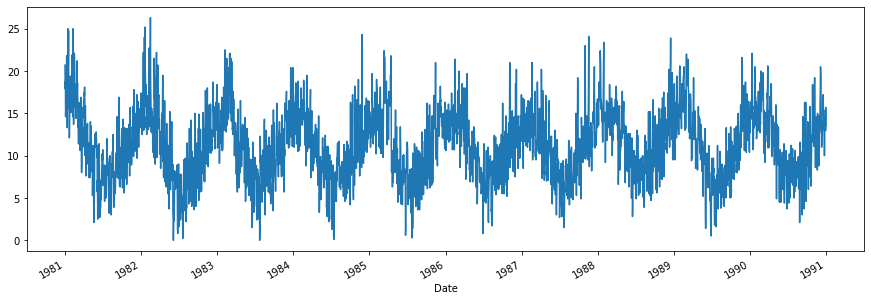

In [9]:
df['Temp'].plot(figsize=(15,5))

<AxesSubplot:xlabel='Date'>

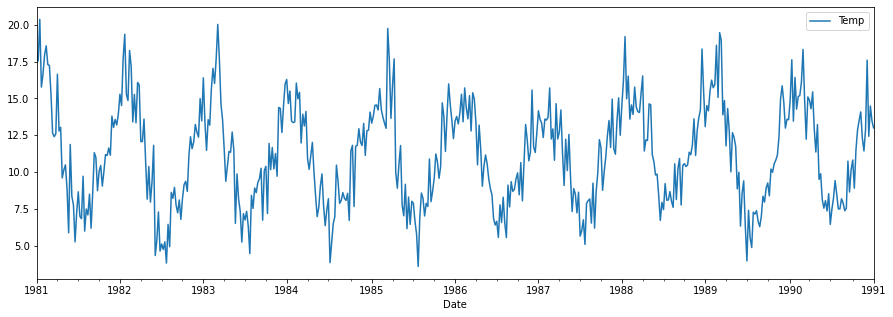

In [11]:
df.resample('W').mean().plot(figsize=(15,5))

<AxesSubplot:xlabel='Date'>

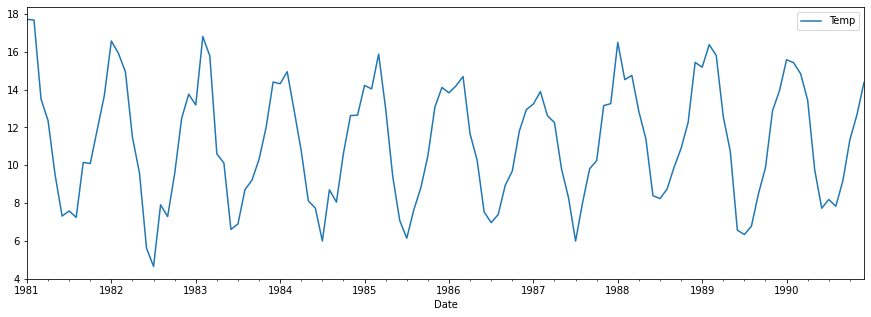

In [12]:
df.resample('M').mean().plot(figsize=(15,5))

In [13]:
df = df.resample('M').mean()
df.head()

,Temp
Date,
1981-01-31,17.712903
1981-02-28,17.678571
1981-03-31,13.500000
1981-04-30,12.356667
1981-05-31,9.490323


# Naive Time Series Forecasting

## One-Shift

In [15]:
pred = df.copy()
pred['Pred'] = df['Temp'].shift(1)
pred = pred.shift(1)
pred.head()

,Temp,Pred
Date,,
1981-01-31,NaN,NaN
1981-02-28,17.712903,NaN
1981-03-31,17.678571,17.712903
1981-04-30,13.500000,17.678571
1981-05-31,12.356667,13.500000


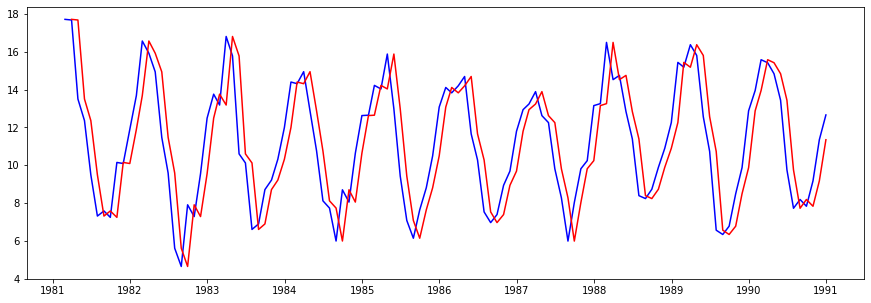

In [20]:
plt.figure(figsize=(15,5))
plt.plot(pred['Temp'], 'b-', label='Actual')
plt.plot(pred['Pred'], "r", label='Predict')

### Mean as Forecast

In [23]:
pred = df.copy()
pred['Pred'] = [df.loc[:date]['Temp'].mean() for date in df.index]
pred = pred.shift(1)

<b>mengambil nilai rata rata pada data sebelumnya, jadi misal tanggal 10, berarti mengambil nilai rata rata dari tanggal 1 sampai 9

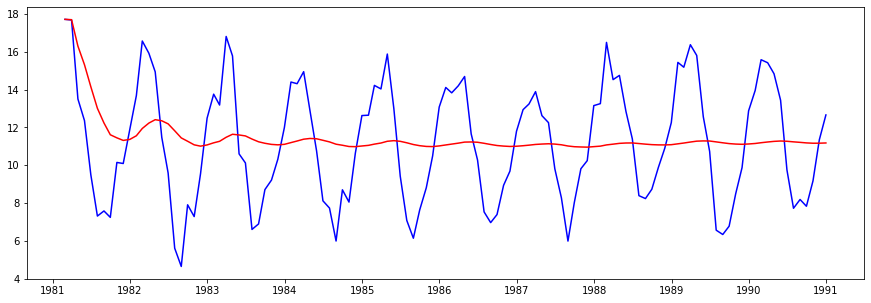

In [24]:
plt.figure(figsize=(15,5))
plt.plot(pred['Temp'], 'b-', label='Actual')
plt.plot(pred['Pred'], "r", label='Predict')

### Moving Average / Rolling Mean Forecasting

mengambil nilai rata-rata sambil bergerak

In [25]:
pred = df.copy()
pred['Pred'] = df.rolling(3).mean()
pred = pred.shift(1)

<b>menentukan seberapa jauh kebelakang nya bisa menggunakan tuning

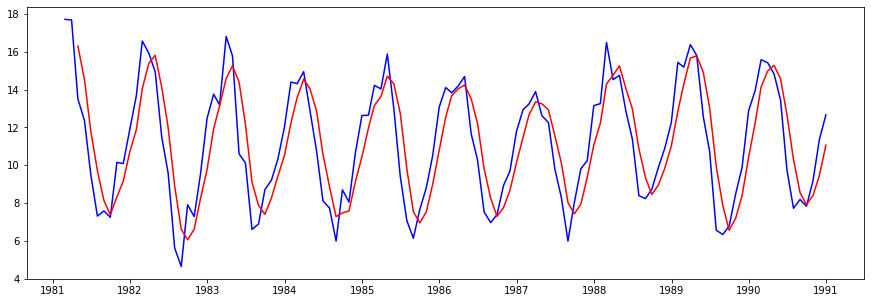

In [26]:
plt.figure(figsize=(15,5))
plt.plot(pred['Temp'], 'b-', label='Actual')
plt.plot(pred['Pred'], "r", label='Predict')